# Homework 5

November 29, 2021
Cassia Cai

The goal of this homework is to summarize all your measurements into a single plot: drag coefficient as a function or the Reynolds number.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

1. For the experiment with spheres falling in viscous fluid, calculate the terminal velocity and the drag force from your measurements. Then use the terminal velocity, the diameter of the sphere, and the viscosity of the fluid to define the Reynolds number. Calculate the drag coefficient as the drag force divided by rho*U^2/2 and by the cross sectional area. How good is the comparison between the Stokes’s drag law and the measured drag? Using the Stokes drag law, what would be the expected Cd as a function of Re number.

In [49]:
# lab measurements and calculate terminal velocity
D = list([0.004, 0.006, 0.008, 0.008, 0.006, 0.006, 0.004, 0.004, 0.002, 0.006, 0.008, 
         0.004, 0.004, 0.006, 0.003]) #meter
M = list([0.00009, 0.00022, 0.00210, 0.00210, 0.00089, 0.00089, 0.00026, 0.00026, 0.00064,
         0.00183, 0.01050, 0.00076, 0.00028, 0.00067, 0.00057]) #kilogram
R = [d/2 for d in D] #meter
s = list([38.66, 22.58, 1.60, 1.82, 2.72, 2.84, 5.60, 5.63, 13.45, 12.00, 1.60, 4.40, 34.40, 20.00, 9.00])
dist = list([0.160, 0.160, 0.160, 0.160, 0.160, 0.160, 0.160, 0.160, 0.160, 0.167, 0.167, 0.167, 0.167, 0.167, 0.167])

df = pd.DataFrame({'D':D,'M': M,'R': R, 'time':s, 'dist': dist})
df['term_vel'] = df.dist / df.time #terminal velocity
df['Vol'] = (4/3)*pi*df.R**3
df['roh_sphere'] = df.M/df.Vol
df

,D,M,R,time,dist,term_vel,Vol,roh_sphere
0,0.004,0.00009,0.0020,38.66,0.160,0.004139,3.351032e-08,2685.739665
1,0.006,0.00022,0.0030,22.58,0.160,0.007086,1.130973e-07,1945.227082
2,0.008,0.00210,0.0040,1.60,0.160,0.100000,2.680826e-07,7833.407355
3,0.008,0.00210,0.0040,1.82,0.160,0.087912,2.680826e-07,7833.407355
4,0.006,0.00089,0.0030,2.72,0.160,0.058824,1.130973e-07,7869.327742
5,0.006,0.00089,0.0030,2.84,0.160,0.056338,1.130973e-07,7869.327742
6,0.004,0.00026,0.0020,5.60,0.160,0.028571,3.351032e-08,7758.803476
7,0.004,0.00026,0.0020,5.63,0.160,0.028419,3.351032e-08,7758.803476
8,0.002,0.00064,0.0010,13.45,0.160,0.011896,4.188790e-09,152788.745368
9,0.006,0.00183,0.0030,12.00,0.167,0.013917,1.130973e-07,16180.752548


In [52]:
# Calculate drag force
pi = np.pi
mu = 1.490 # N s/m2, Glycerine, N = kg m/s2, mu [kg m s / m2 s2] = [kg / m s] 
rho = 1259 #kg/m3 Glycerine
df['drag_force'] = df.M*9.8 - 9.8*rho*(4/3)*pi*(df.R**3)
df

,D,M,R,time,dist,term_vel,Vol,roh_sphere,drag_force,Re
0,0.004,0.00009,0.0020,38.66,0.160,0.004139,3.351032e-08,2685.739665,0.000469,0.021939
1,0.006,0.00022,0.0030,22.58,0.160,0.007086,1.130973e-07,1945.227082,0.000761,0.056344
2,0.008,0.00210,0.0040,1.60,0.160,0.100000,2.680826e-07,7833.407355,0.017272,1.060211
3,0.008,0.00210,0.0040,1.82,0.160,0.087912,2.680826e-07,7833.407355,0.017272,0.932053
4,0.006,0.00089,0.0030,2.72,0.160,0.058824,1.130973e-07,7869.327742,0.007327,0.467740
5,0.006,0.00089,0.0030,2.84,0.160,0.056338,1.130973e-07,7869.327742,0.007327,0.447976
6,0.004,0.00026,0.0020,5.60,0.160,0.028571,3.351032e-08,7758.803476,0.002135,0.151459
7,0.004,0.00026,0.0020,5.63,0.160,0.028419,3.351032e-08,7758.803476,0.002135,0.150652
8,0.002,0.00064,0.0010,13.45,0.160,0.011896,4.188790e-09,152788.745368,0.006220,0.031530
9,0.006,0.00183,0.0030,12.00,0.167,0.013917,1.130973e-07,16180.752548,0.016539,0.110659


In [53]:
# Calculate Reynolds number
df['Re'] = (rho*df.term_vel*2*(df.R))/mu
df

,D,M,R,time,dist,term_vel,Vol,roh_sphere,drag_force,Re
0,0.004,0.00009,0.0020,38.66,0.160,0.004139,3.351032e-08,2685.739665,0.000469,0.013988
1,0.006,0.00022,0.0030,22.58,0.160,0.007086,1.130973e-07,1945.227082,0.000761,0.035924
2,0.008,0.00210,0.0040,1.60,0.160,0.100000,2.680826e-07,7833.407355,0.017272,0.675973
3,0.008,0.00210,0.0040,1.82,0.160,0.087912,2.680826e-07,7833.407355,0.017272,0.594262
4,0.006,0.00089,0.0030,2.72,0.160,0.058824,1.130973e-07,7869.327742,0.007327,0.298223
5,0.006,0.00089,0.0030,2.84,0.160,0.056338,1.130973e-07,7869.327742,0.007327,0.285622
6,0.004,0.00026,0.0020,5.60,0.160,0.028571,3.351032e-08,7758.803476,0.002135,0.096568
7,0.004,0.00026,0.0020,5.63,0.160,0.028419,3.351032e-08,7758.803476,0.002135,0.096053
8,0.002,0.00064,0.0010,13.45,0.160,0.011896,4.188790e-09,152788.745368,0.006220,0.020103
9,0.006,0.00183,0.0030,12.00,0.167,0.013917,1.130973e-07,16180.752548,0.016539,0.070555


The Re numbers are between 0 and 1. This means flow is laminar (so no turbulence!)

In [54]:
# Calculate drag coefficient
df['dragCoeff'] = df.drag_force/(((rho*(df.term_vel**2))/2)*(pi*df.R**2))
df

,D,M,R,time,dist,term_vel,Vol,roh_sphere,drag_force,Re,dragCoeff
0,0.004,0.00009,0.0020,38.66,0.160,0.004139,3.351032e-08,2685.739665,0.000469,0.013988,3458.020335
1,0.006,0.00022,0.0030,22.58,0.160,0.007086,1.130973e-07,1945.227082,0.000761,0.035924,851.071595
2,0.008,0.00210,0.0040,1.60,0.160,0.100000,2.680826e-07,7833.407355,0.017272,0.675973,54.586554
3,0.008,0.00210,0.0040,1.82,0.160,0.087912,2.680826e-07,7833.407355,0.017272,0.594262,70.629883
4,0.006,0.00089,0.0030,2.72,0.160,0.058824,1.130973e-07,7869.327742,0.007327,0.298223,118.962797
5,0.006,0.00089,0.0030,2.84,0.160,0.056338,1.130973e-07,7869.327742,0.007327,0.285622,129.691060
6,0.004,0.00026,0.0020,5.60,0.160,0.028571,3.351032e-08,7758.803476,0.002135,0.096568,330.548650
7,0.004,0.00026,0.0020,5.63,0.160,0.028419,3.351032e-08,7758.803476,0.002135,0.096053,334.099729
8,0.002,0.00064,0.0010,13.45,0.160,0.011896,4.188790e-09,152788.745368,0.006220,0.020103,22226.525323
9,0.006,0.00183,0.0030,12.00,0.167,0.013917,1.130973e-07,16180.752548,0.016539,0.070555,4797.773221



$$C_{d} = \frac{D}{\rho A \frac{U^2}{2}} = \frac{6 \pi \mu D U}{\rho (2 \pi \frac{D^2}{2}) \frac{U^2}{2}} = \frac{6 v 4 D}{U D^2} $$

$$Re = \frac{U D}{v} $$

$$C_{d} = \frac{24 v }{U D} = \frac{24}{Re} $$


In [55]:
# Calculated expected drag coefficient
df['C_d'] = 24/df.Re
df

,D,M,R,time,dist,term_vel,Vol,roh_sphere,drag_force,Re,dragCoeff,C_d
0,0.004,0.00009,0.0020,38.66,0.160,0.004139,3.351032e-08,2685.739665,0.000469,0.013988,3458.020335,1715.748610
1,0.006,0.00022,0.0030,22.58,0.160,0.007086,1.130973e-07,1945.227082,0.000761,0.035924,851.071595,668.073868
2,0.008,0.00210,0.0040,1.60,0.160,0.100000,2.680826e-07,7833.407355,0.017272,0.675973,54.586554,35.504369
3,0.008,0.00210,0.0040,1.82,0.160,0.087912,2.680826e-07,7833.407355,0.017272,0.594262,70.629883,40.386219
4,0.006,0.00089,0.0030,2.72,0.160,0.058824,1.130973e-07,7869.327742,0.007327,0.298223,118.962797,80.476569
5,0.006,0.00089,0.0030,2.84,0.160,0.056338,1.130973e-07,7869.327742,0.007327,0.285622,129.691060,84.027006
6,0.004,0.00026,0.0020,5.60,0.160,0.028571,3.351032e-08,7758.803476,0.002135,0.096568,330.548650,248.530580
7,0.004,0.00026,0.0020,5.63,0.160,0.028419,3.351032e-08,7758.803476,0.002135,0.096053,334.099729,249.861994
8,0.002,0.00064,0.0010,13.45,0.160,0.011896,4.188790e-09,152788.745368,0.006220,0.020103,22226.525323,1193.834392
9,0.006,0.00183,0.0030,12.00,0.167,0.013917,1.130973e-07,16180.752548,0.016539,0.070555,4797.773221,340.161615


The expected CD is inversely related to Re. In short, 
$$C_{d}(Re) = \frac{24}{Re} $$

In [56]:
# make the line that we expect to see (from Stokes Law drag coeff)
Re = np.arange(0.001,1,0.001)
Cd_Re = [24/x for x in Re]

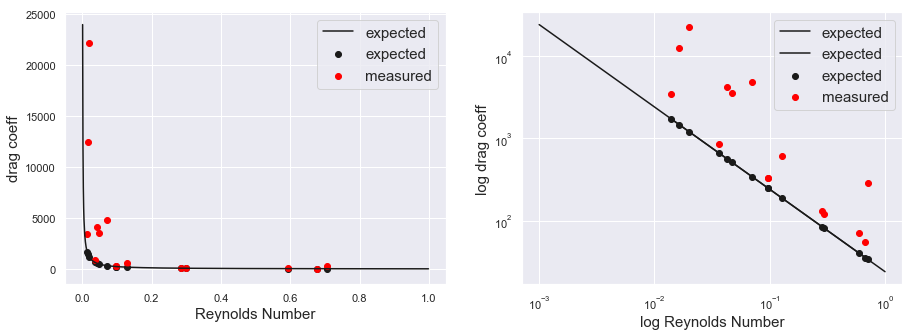

In [62]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
df_new = pd.DataFrame({'Re':df.Re,'C_d': df.C_d, 'dragCoeff': df.dragCoeff})
df_new_sorted = df_new.sort_values(by=['Re'])
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(Re, Cd_Re, label = 'expected',c='k')
plt.scatter(df_new_sorted.Re, df_new_sorted.C_d, label='expected',c='k')
plt.scatter(df_new_sorted.Re, df_new_sorted.dragCoeff, label='measured',c='red')
plt.xlabel('Reynolds Number',fontsize=15)
plt.ylabel('drag coeff',fontsize=15)
plt.legend(prop={'size': 15})

plt.subplot(1, 2, 2)
df_new = pd.DataFrame({'Re':df.Re,'C_d': df.C_d, 'dragCoeff': df.dragCoeff})
df_new_sorted = df_new.sort_values(by=['Re'])
plt.scatter(df_new_sorted.Re, df_new_sorted.C_d, label = 'expected',c='k')
plt.plot(df_new_sorted.Re, df_new_sorted.C_d, label = 'expected',c='k')
plt.scatter(df_new_sorted.Re, df_new_sorted.dragCoeff, label = 'measured',c='red')
plt.plot(Re, Cd_Re, label = 'expected',c='k')
plt.xlabel('log Reynolds Number',fontsize=15)
plt.ylabel('log drag coeff',fontsize=15)
plt.xscale('log'); plt.yscale('log')
plt.legend(prop={'size': 15})

plt.show()

The expected drag coefficient is an underestimate of the measured drag coefficient (referring primarily to the log plot). We see that in the log diagram, both have a negative slope. There are many reasons why they are not the same. For example, we don't know if the ball is actually at terminal velocity when we dropped it. Stokes' Law also makes many assumptions for the behavior of a particle in a fluid: (1) laminar flow, (2) spherical particles, (3) homogenous (uniform in composition) material, (4) smooth surfaces, and (5) particles do not interfer with each other. These assumptions may not be perfectly met in the actual experiment.

These are low Reynolds number flows, so there is no flow separation expected to occur around the sphere. The drag comes from skin fraction. Stokes Drag Law tells us pretty much the same information. However, the Stokes Law drag coefficient estimate underpredicts the measured drag coefficients.

2. For the experiment with the spheres hanging on a wire and deflected by the flow, write down the force balance in the x and z directions. Using the weight of the sphere in water and the measured deflection angle, calculate the drag force and the corresponding drag coefficient for all of the measurement.

In [72]:
# lab measurements in the form [group 1, group 2, group 3] I will combine the measurements
width = 4.5/100 # tank width in m 
L_0 = 0.36 # m
L_03 = 0.370 #length of wire, slightly different for 3rd sphere [m]

L_1 = [0.035,0.06,0.09]; H_1 = [0.099,0.094,0.081]
M_1 = [0.3/1000,1.2/1000,0.2/1000]; D_1 = [0.012, 0.017, 0.039] # if I remember the order correctly
df_1 = pd.DataFrame({'L':L_1,'H': H_1, 'M': M_1, 'D': D_1})

L_2 = [0.04,0.045,0.05]; H_2 = [0.060,0.053,0.049]
M_2 = [0.3/1000,1.2/1000,0.2/1000]; D_2 = [0.012, 0.017, 0.039]
df_2 = pd.DataFrame({'L':L_2,'H': H_2, 'M': M_2, 'D': D_2})

L_3 = [0.048,0.06,0.01]; H_3 = [0.062,0.058,0.086]
M_3 = [0.3/1000,1.2/1000,0.2/1000]; D_3 = [0.012, 0.017, 0.039]
df_3 = pd.DataFrame({'L':L_3,'H': H_3, 'M': M_3, 'D': D_3})

df_1['Q'] = [0.910/7620,0.910/7620,0.910/7620]
df_2['Q'] = [0.910/7620,0.910/7620,0.910/7620]
df_3['Q'] = [0.910/7620,0.910/7620,0.910/7620]

df_1['U'] = df_1['Q']/(width*df_1.H)
df_2['U'] = df_2['Q']/(width*df_2.H)
df_3['U'] = df_3['Q']/(width*df_3.H)

In [73]:
df_1

,L,H,M,D,Q,U
0,0.035,0.099,0.0003,0.012,0.000119,0.026806
1,0.060,0.094,0.0012,0.017,0.000119,0.028232
2,0.090,0.081,0.0002,0.039,0.000119,0.032763


In [74]:
# Calculate drag force
kin_vis_water = 0.001
dens_water = 1000

(1) x direction
$$ F_{x} = F_{drag}  - F_{T}sin(\theta) = 0 $$

(2) z direction
$$ F_{z} = F_{T}cos(\theta)  - F_{grav} = 0 $$

$$ F_{grav} = F_{T}cos(\theta) $$  

$$ F_{drag} = F_{T}sin(\theta) $$

$$ F_{drag} = F_{grav } \frac{sin(\theta)}{cos(\theta)} $$ 

$$ F_{drag} = F_{grav} tan(\theta) $$ 


$$ F_{drag} = F_{grav}  \frac{L}{H} $$

In [89]:
df_1['angle'] = np.arcsin(df.D/L_0)
df_2['angle'] = np.arcsin(df.D/L_0)
df_3['angle'] = np.arcsin(df.D/L_03)

df_1['f_drag'] = df_1.M*9.8*np.tan(df_1['angle'])
df_2['f_drag'] = df_2.M*9.8*np.tan(df_1['angle'])
df_3['f_drag'] = df_3.M*9.8*np.tan(df_1['angle'])

df_1['drag_C'] = df_1.f_drag/(((dens_water*(df_1.U**2))/2)*(pi*(df_1.D/2)**2))
df_2['drag_C'] = df_2.f_drag/(((dens_water*(df_2.U**2))/2)*(pi*(df_2.D/2)**2))
df_3['drag_C'] = df_3.f_drag/(((dens_water*(df_3.U**2))/2)*(pi*(df_3.D/2)**2))

df_1['Re'] = dens_water*df_1.U*df_1.D/kin_vis_water 
df_2['Re'] = dens_water*df_2.U*df_2.D/kin_vis_water 
df_3['Re'] = dens_water*df_3.U*df_3.D/kin_vis_water 

df_1['Cd'] = 24/df_1.Re
df_2['Cd'] = 24/df_2.Re
df_3['Cd'] = 24/df_3.Re

In [90]:
print('Group 1 measurements'); df_1

Group 1 measurements


,L,H,M,D,Q,U,f_drag,drag_C,Re,Cd,angle
0,0.035,0.099,0.0003,0.012,0.000119,0.026806,0.000033,0.803955,321.676962,0.074609,0.011111
1,0.060,0.094,0.0012,0.017,0.000119,0.028232,0.000196,2.167038,479.948872,0.050005,0.016667
2,0.090,0.081,0.0002,0.039,0.000119,0.032763,0.000044,0.067949,1277.772377,0.018783,0.022224


In [91]:
print('Group 2 measurements'); df_2

Group 2 measurements


,L,H,M,D,Q,U,f_drag,drag_C,Re,Cd,angle
0,0.040,0.060,0.0003,0.012,0.000119,0.044231,0.000033,0.295300,530.766987,0.045218,0.011111
1,0.045,0.053,0.0012,0.017,0.000119,0.050072,0.000196,0.688910,851.230074,0.028194,0.016667
2,0.050,0.049,0.0002,0.039,0.000119,0.054160,0.000044,0.024866,2112.235971,0.011362,0.022224


In [92]:
print('Group 3 measurements'); df_3

Group 3 measurements


,L,H,M,D,Q,U,f_drag,drag_C,Re,Cd,angle
0,0.048,0.062,0.0003,0.012,0.000119,0.042804,0.000033,0.315315,513.645472,0.046725,0.010811
1,0.060,0.058,0.0012,0.017,0.000119,0.045756,0.000196,0.825024,777.848171,0.030854,0.016217
2,0.010,0.086,0.0002,0.039,0.000119,0.030859,0.000044,0.076597,1203.483286,0.019942,0.021623


In [93]:
new_df = pd.concat([df_1, df_2, df_3]).reset_index()
new_df.sort_values(by=['H']).drop(columns=['index'])

,L,H,M,D,Q,U,f_drag,drag_C,Re,Cd,angle
5,0.050,0.049,0.0002,0.039,0.000119,0.054160,0.000044,0.024866,2112.235971,0.011362,0.022224
4,0.045,0.053,0.0012,0.017,0.000119,0.050072,0.000196,0.688910,851.230074,0.028194,0.016667
7,0.060,0.058,0.0012,0.017,0.000119,0.045756,0.000196,0.825024,777.848171,0.030854,0.016217
3,0.040,0.060,0.0003,0.012,0.000119,0.044231,0.000033,0.295300,530.766987,0.045218,0.011111
6,0.048,0.062,0.0003,0.012,0.000119,0.042804,0.000033,0.315315,513.645472,0.046725,0.010811
2,0.090,0.081,0.0002,0.039,0.000119,0.032763,0.000044,0.067949,1277.772377,0.018783,0.022224
8,0.010,0.086,0.0002,0.039,0.000119,0.030859,0.000044,0.076597,1203.483286,0.019942,0.021623
1,0.060,0.094,0.0012,0.017,0.000119,0.028232,0.000196,2.167038,479.948872,0.050005,0.016667
0,0.035,0.099,0.0003,0.012,0.000119,0.026806,0.000033,0.803955,321.676962,0.074609,0.011111


In the above table, I show my calculated drag force and corresponding drag coefficient. 
f_drag and drag_C if it is not clear

The Reynolds numbers are very high (much higher than our measurements for Question 1 Sinking Spheres). The Reynold numbers (of Question 2 compared with Question 1) are three to four orders of magnitude higher.

3. Create a plot of Cd (Re) for all measurements, adding for reference a curve with the expected law for low Reynolds number flow. How does the drag coefficient change with the Reynolds number. Rationalize the Cd(Re) dependence based on the drag processes discussed in class.

In [94]:
# make the line that we expect to see (Pg. 271 in textbook)
Re = np.arange(10,2300,1)
Cd_Re = [24/x for x in Re]

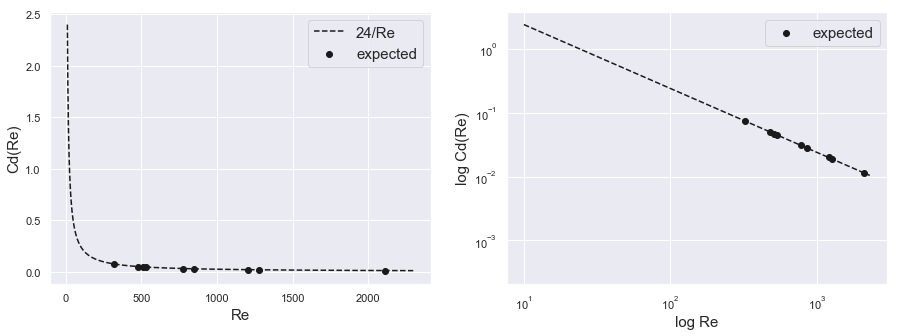

In [100]:
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.scatter(new_df.Re, new_df.Cd,label='expected',c='k')
plt.plot(Re, Cd_Re, '--',label='24/Re',c='k')
plt.legend(prop={'size': 15})
plt.xlabel('Re', fontsize = 15);plt.ylabel('Cd(Re)', fontsize = 15)

plt.subplot(1, 2, 2)
plt.scatter(new_df.Re, new_df.Cd,label='expected',c='k')
plt.plot(Re, Cd_Re, '--',c='k')
plt.legend(prop={'size': 15})
plt.xlabel('log Re', fontsize = 15);plt.ylabel('log Cd(Re)', fontsize = 15)
plt.xscale('log'); plt.yscale('log')
plt.show()

The drag coefficient is 24/Re. 

Rationalize: 

From the last figure in this file, we see that for high Re numbers, the Stokes Law does not hold. The curve looks kind of funny. In log space, the drag coefficient has a negative dependency on Re. For laminar flow, skin friction dominates as the drag (as opposed to form drag). When the Reynolds number is increased, form drag becomes more dominant so Stokes Law is not a good estimation for these higher Re flows. This is why the scatter plots for Question 1 and Question 2 are so different. Our measurements are fine!

Notes: 
- Decreasing fluid viscosity = increase Re = decrease drag because less skin friction drag 
- Increase sphere diameter (but keep mass and terminal velocity as before) = lower density but larger surface area = higher skin friction drag and decreases Re 

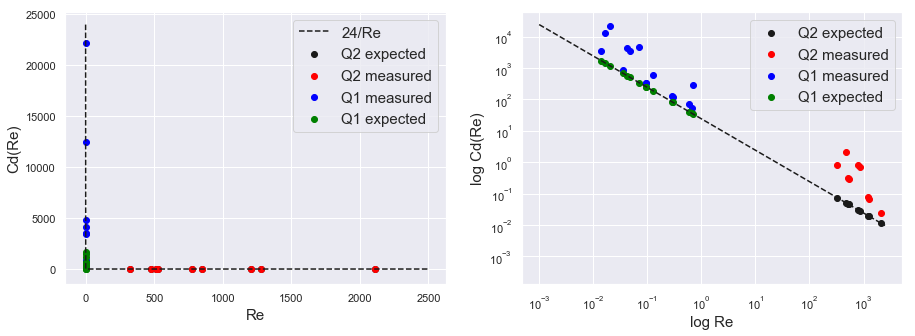

In [110]:
# Adding the results from Question 1 into these plots
Re = np.arange(0.001,2500,0.001)
Cd_Re = [24/x for x in Re]

plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1, 2, 1)
plt.scatter(new_df.Re, new_df.Cd,label='Q2 expected',c='k')
plt.scatter(new_df.Re, new_df.drag_C,label='Q2 measured',c='red')
plt.plot(Re, Cd_Re, '--',label='24/Re',c='k')
plt.scatter(df_new_sorted.Re, df_new_sorted.dragCoeff, label='Q1 measured',c='blue')
plt.scatter(df_new_sorted.Re, df_new_sorted.C_d, label='Q1 expected',c='green')
plt.legend(prop={'size': 15})
plt.xlabel('Re', fontsize = 15);plt.ylabel('Cd(Re)', fontsize = 15)

plt.subplot(1, 2, 2)
plt.scatter(new_df.Re, new_df.Cd,label='Q2 expected',c='k')
plt.scatter(new_df.Re, new_df.drag_C,label='Q2 measured',c='red')
plt.scatter(df_new_sorted.Re, df_new_sorted.dragCoeff, label='Q1 measured',c='blue')
plt.scatter(df_new_sorted.Re, df_new_sorted.C_d, label='Q1 expected',c='green')
plt.plot(Re, Cd_Re, '--',c='k')
plt.legend(prop={'size': 15})
plt.xlabel('log Re', fontsize = 15);plt.ylabel('log Cd(Re)', fontsize = 15)
plt.xscale('log'); plt.yscale('log')
plt.show()

In the above figure (we weren't asked to do this). From the figure below, we see that Stoke's Law does not hold for all Reynolds numbers. We can also confirm this looking at the figure below.

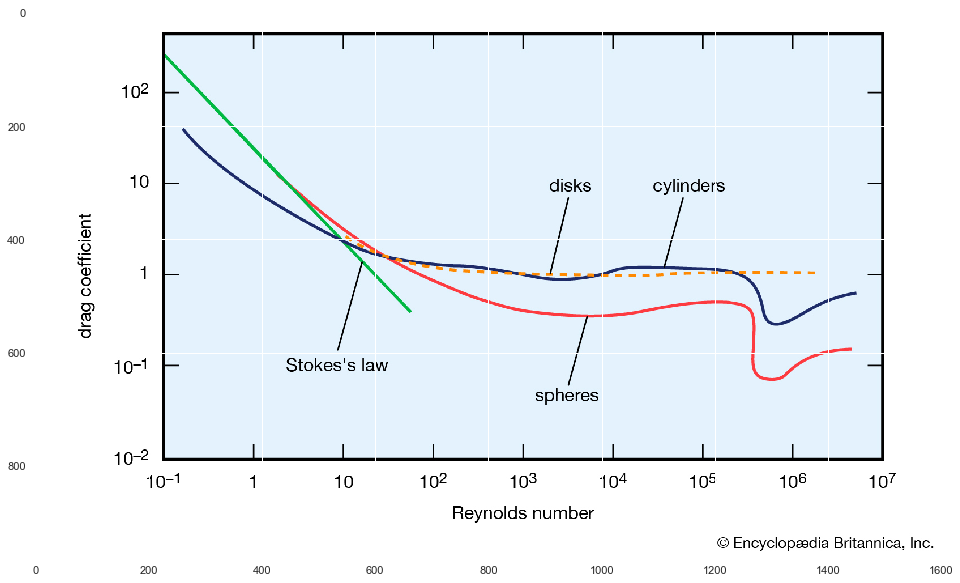

In [20]:
import matplotlib.pyplot as plt; import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (20,10)
image = mpimg.imread("/Users/cassiacai/Desktop/Variation-drag-coefficient-number-spheres-disks-Reynolds.jpg")
plt.imshow(image)
plt.show()